## Plotting

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.insert(0, "..")
from floral.utils.plotting import (
    OUTPUT_DIR,
    INDICES, METRICS, MODES,
    load_runs,
    histories_to_df,
)
HISTORIES = load_runs(output_dir=os.path.join("..", OUTPUT_DIR))

# --- Choose Task --- #
# task = "synthetic_linear_simple"
# task = "synthetic_linear"
# task = "synthetic_mlp_simple"
# task = "synthetic_mlp"
# task = "synthetic_mlp_bn"
# task = "mnist_rotate"
# task = "mnist_label_shift"
# task = "cifar10_rotate"
# task = "cifar10_label_shift"
task = "cifar100"
# task = "cifar100_reduced"
# task = "emnist"
# task = "shakespeare"
# task = "stackoverflow"


In [2]:
filter_values = f"""
experiment: [test_{task}]
"""
ignore_values = """
"""
history_df = histories_to_df(HISTORIES,
                             filter_values=OmegaConf.create(filter_values),
                             ignore_values=OmegaConf.create(ignore_values),
                             downsample_len=100,
                             hide_na=False)

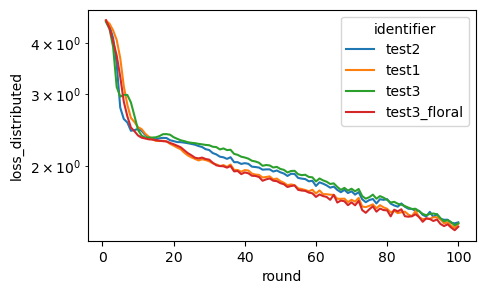

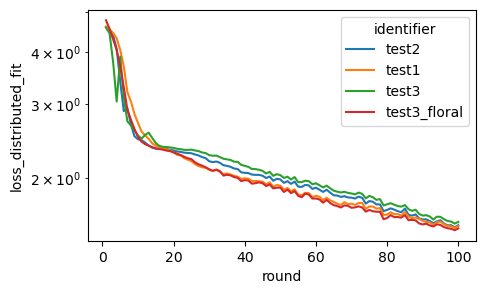

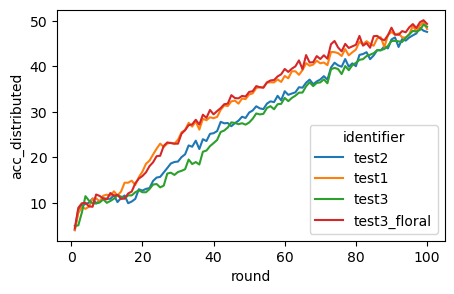

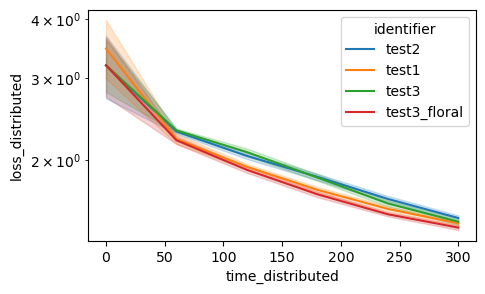

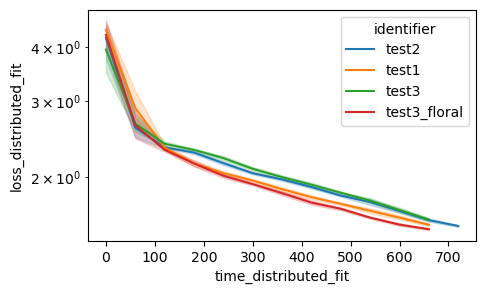

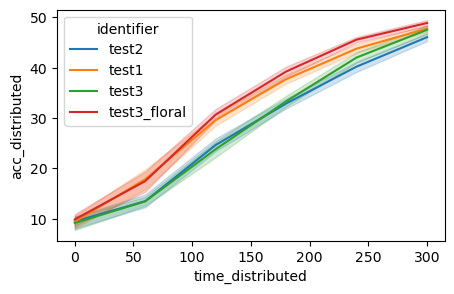

In [3]:
for index in INDICES:
    for metric in METRICS:
        for mode in MODES:
            x = index if index == "round" else f"{index}_{mode}"
            y = f"{metric}_{mode}"
            if x not in history_df.columns or y not in history_df.columns:
                continue
            history_df = history_df.dropna(subset=x)
            if len(history_df) == 0 or history_df[y].sum() == 0.0:
                continue
            fig, ax = plt.subplots(1)
            sns.lineplot(x=x, y=y, hue="identifier", data=history_df, ax=ax)
            # sns.lineplot(x=x, y=y, data=history_df, ax=ax, hue="lr", size="reg")
            if 'acc' not in metric:
                ax.set_yscale('log')

In [4]:
metric = "loss_distributed"
last_round_df = history_df[history_df["round"] == history_df["round"].max()]
last_round_df[last_round_df[metric] == last_round_df[metric].min()]

,round,round_distributed_fit,loss_distributed_fit,router_entropy_distributed_fit,losses_distributed,loss_distributed,acc_distributed,time_distributed,time_distributed_fit,identifier,...,alpha,num_clusters,router_temp,bias,lora,convlora,embeddinglora,normlora,convlora_method,normlora_reparam
399,100,100.0,1.512607,0.0,1.418718,1.418718,49.372,300.0,660.0,test3_floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True


In [5]:
metric = "acc_distributed"
last_round_df = history_df[history_df["round"] == history_df["round"].max()]
last_round_df[last_round_df[metric] == last_round_df[metric].min()]

,round,round_distributed_fit,loss_distributed_fit,router_entropy_distributed_fit,losses_distributed,loss_distributed,acc_distributed,time_distributed,time_distributed_fit,identifier,...,alpha,num_clusters,router_temp,bias,lora,convlora,embeddinglora,normlora,convlora_method,normlora_reparam
99,100,100.0,1.539899,0.0,1.454058,1.454058,47.612,300.0,720.0,test2,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
